# Week 7: Natural language processing

The exercises today are about extracting high-level knowledge from text. We're still a long way from computers being able to give us insight as deep as that which we can aquire from manually reading text, but some the tools that you will use today get us a long way in understanding useful things about unreadibly large amount of text in comparatively little time. In the exercises today you will:

* Create wordclouds
* Extract sentiment from text
* Construct a Bag of Words (BoW) matrix to represent how words are used about each faction in the Marvel dataset
* Perform a TD-IDF transform to understand which words are important to different characters
* Use a state-of-the-art topic modeling method to get an idea of which major topics exist in the Marvel universe


## Exercises

### Part 0: Clean text

The first task when working with text, is almost always to somehow clean the text. In our case, text is formatted
as Mediawiki markup, which has its quirks as you probably remember. So we need to clean this text and most of the
way we need to do it manually. But while this is a meaningful thing to learn to do, we don't want to take time away from the more important exercises
that come later in this exercise set. Therefore, you will find two helper functions in this notebook that (1) extracts and clean
the markup text of a Wikipedia page, and (2) tokenizes text, that is extracts a neat list of words used.

In [4]:
import re
import nltk

def get_clean_text(title, folder):
    """Given a character name (title) and a folder in which to find it
    return the page markup as a neatly cleaned string.
    
    Input
    -----
        title : str
        folder : str
    
    Output
    ------
        text : str
        
    Example
    -------
        >>> get_clean_text('Iron Man', 'heroes')
    """
    # Load markup
    with open(f"../data/{folder}/{title}.txt") as fp:
        text = fp.read()

    # Remove category links
    text = re.sub(r'\[\[Category.+\]\]', '', text)
    
    # Fix links (match and clear "[[Iron Man (comic book)|" and "[[", then on next line "]]"
    text = re.sub(r'(\[\[((?!\]\]).)+\|)|(\[\[)', '', text)
    text = re.sub(r'\]\]', '', text)
    
    # Remove '''
    text = re.sub(r"'''", '', text)
    
    # Remove refs
    text = re.sub(r'<ref.+?</ref>', '', text)
    
    # Remove other ugly html links
    text = re.sub(r'<.+?>', '', text)
    
    # Remove '=' signs in headers
    text = re.sub(r'=+', '', text)
    
    # Remove table and external links
    text = re.sub(r'\{\{[\w\W]*?\}\}', '', text)
    
    # Remove everything after "See Also"
    text = re.sub(r'== ?See [aA]lso[\w\W]+', "", text)

    return text

get_clean_text("Iron Man", "heroes")

'\n\n\n\n\n| image  Iron Man (circa 2018).png\n| caption  Iron Man on the variant cover of \'\'Tony Stark: Iron Man\'\' #2 (July 2018).Art by Mark Brooks.\n| alt  Iron Man takes flight\n| publisher  Marvel Comics\n| debut  \'\'Tales of Suspense\'\' #39 (March 1963)\n| creators  Stan LeeLarry LieberDon HeckJack Kirby\n| alter_ego  Anthony Edward "Tony" Stark\n| species  \n| homeworld  Long Island, New York\n| alliances  AvengersA.I. ArmyDepartment of DefenseForce WorksNew AvengersGuardians of the GalaxyIlluminatiMighty AvengersS.H.I.E.L.D.Stark IndustriesStark ResilientThunderbolts\n| partners  War MachineRescue  Ironheart  Wasp  Spider-Man  Captain America\n| support\n| powers *Genius level intellect\n*Proficient scientist and engineer\n*Highly skilled martial artist and hand-to-hand combatant\n*Powered armor suit:\n**Superhuman strength and durability (when using his armor)\n**Supersonic flight\n**Energy repulsor and missile projection\n**Regenerative life support\n\n}}\n\nIron Man is

### Part 1: Wordcloud

Although they probably offer more buzz than usefulness, wordclouds are a fun way to get quick insight into which words are used in a corpus of text. In this section you will generate one. 

> You have to import `matplotlib.pylab` and `wordcloud` to do this. You can install `wordcloud` with anaconda by typing into your console*
>
>        conda install -c conda-forge wordcloud
>
>*or*
>
>        pip install wordcloud

Here is an example generating a wordcloud based on the Iron Man file; make sure you understand it before you get started.

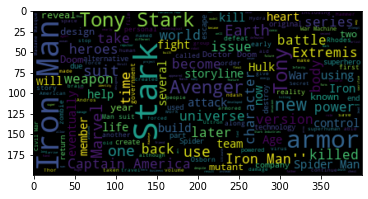

In [6]:
#wordcloud example
from wordcloud import WordCloud
import  matplotlib.pylab as plt

ironman_text = get_clean_text("Iron Man", "heroes")

wc_ironman = WordCloud(max_font_size=40).generate(ironman_text)

plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
plt.imshow(wc_ironman, interpolation="bilinear")

>**Ex. 7.1.1**: Make a word cloud for each faction using the `wordcloud` module!
* For each faction, concatenate all (cleaned) text about each character into one long string.
* Make three plots with appropriate titles, so one can compare them visually.
* You could choose to exclude all character names from the strings, that my give more interesting results. Not a requirement.
* Comment on the differences you see.
>


### Part 2: Sentiment analysis

Let's say you have an enormous amount of text, and you want to know something about its about its level of negativity, neutrality or positivity.  Enter *Sentiment Analysis*. The point of this exercise is to extract the sentiment of the text on your heroes, villains and ambiguous characters and figure out whether Wikipedia is biased towards writing in a certain tone towards a certain type of characters.

>**Ex. 7.2.1**: Compute and visualize sentiment scores.
* Using the `VADER` algorithm supported in `nltk` (i.e. `from nltk.sentiment.vader import SentimentIntensityAnalyzer`), you can obtain three scores for a piece of text: its inferred negativity, neutrality and positivity. Read [this](https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f) explanation of sentiment analysis and what VADER is.  [Here](https://github.com/cjhutto/vaderSentiment#about-the-scoring)'s an explanation of how the scoring works.  [Here](https://www.nltk.org/howto/sentiment.html) is an example for you to inspect, look under the heading "Vader".
* Use `SentimentIntensityAnalyzer` to get these three scores __for each character__. Then, for each faction, make three distribution plots (e.g. histograms), that each show how negativity, neutrality and positivity are distributed, respectively. That's 9 plots in total.
* In each of these plots, report the mean of the distribution. Comment on your result. Does writing in Wikipedia seem biased to you?

In [7]:
# example how to use VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create instance of VADER model
model = SentimentIntensityAnalyzer()

text = "This is an example.  It's boring.  But works well as an example!"
scores = model.polarity_scores(text)
print(scores)
print(scores['neg'])

{'neg': 0.176, 'neu': 0.681, 'pos': 0.143, 'compound': -0.126}
0.176


### Part 3: Bag of Words matrix

Intuitively, "Bag of Words" means breaking up a document into words and throwing them into a bag. And that's very close to the truth! In week 5 you constructed a "team-affiliations" matrix which had a row for each character and a column for each team. If the character was on a given team there would be a one for that character row at that team column, if not there would be a zero. The BoW is the same, only now, rather than teams, your columns are individual words that a character's wikipage might contain, and the numbers represent how many times those words appear.
<img src="http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_bow.png" width="400"/>
BoW's are pretty large and sparse (mostly contain zero's) matrices, but they are extremely useful because they allow us to use linear algebra to do things like PCA, classification, etc.

Here is a function for extracting a cleaned list of words from a string of text (meaning, without common words such as prepositions, pronouns, common verbs, etc. -- see stop_words in the code below):

In [6]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Get list of stopwords and add a few
stop_words = set(stopwords.words('english'))

def get_clean_words(text, exclude_words=[]):
    """Given some text, return a list of clean words.
    
    Input
    -----
        text : str
        exclude_words : list
            Words to exclude (e.g. characters own name)
    
    Output
    ------
        words : list
        
    Example
    -------
        >>> my_text = get_clean_text('Iron Man', 'heroes')
        >>> my_words = get_clean_words(text, exclude_words=['Iron', 'Man'])
    """

    # Extarct words
    words = word_tokenize(text)
    
    # Add exclude words to words to give it same treatment
    words += exclude_words
    
    # Convert to lower case
    words = [w.lower() for w in words]
    
    # Clear punctuation
    table = str.maketrans('', '', string.punctuation)
    words = [w.translate(table) for w in words]
    
    # Seperate words and exclude words
    if len(exclude_words) > 0:
        exclude_words = words[-len(exclude_words):]
        words = words[:-len(exclude_words)]
    
    # Remove non-alphabetic words
    words = [w for w in words if w.isalpha()]
    
    # Remove stop words
    words = [w for w in words if not w in stop_words | set(exclude_words)]
    
    # Remove single letter words 
    words = [w for w in words if len(w) > 1]

    return words

>**Ex. 7.3.1**: Create a bag of words matrix that contains all your characters. Maintain also a target array, so you know whether a row corresponds to a hero, a villain or an ambiguous character. Also, **do not include words that only appear for one character**.
1. How many different words are in your vocabulary, i.e. how many columns are in your matrix?
2. Print the 10 most used words, and the 10 least used words, along with their usage count.
3. Plot the distribution of how many times words are used. Scale it appropriately. What does this distribution look like?
>
>*Hint: Since you already extracted lists of words for each faction in Ex. 7.1.1, you can use these to figure out what the total vocabulary of words used in your dataset is. You can "clean up" this vocabulary by a number of tricks. For example, there are tools for *stemming* words to remove grammar so that e.g. 'cat' and 'cats' both become 'cat', but that's all up to you whether you want to go that deep.*

> **Ex. 7.3.2.EXTRA**: Fit a PCA to your BoW matrix. Make a bar plot that shows the explained variance ratio of the first 20 components. What fraction of the total variance do the first 20 components explain?
>
> ***Earn up to 5 extra credit points for solving this problem.***

> **Ex. 7.3.3.EXTRA**: Create a classifier that predicts if a character is a hero or a villain (not ambiguous) from the words used on their page. Report its 10-fold cross validation accuracy. Comment on the result and compare this score with the one obtained in week 5 where you trained on team alliances.
>
> ***Earn up to 5 extra credits for solving this problem.***

### Part 4: TF-IDF

You didn't just make that BoW matrix to count simple things. We are interested in knowing how (or if) words are used differently across characters, and the best way to do that is to used something called a Term Frequency - Inverse Document Frequency (TF-IDF) transformation. You can read about it [on Wikipedia](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), but the gist is that it reflects how important each word is to each document (a document in this case being a character entry on Wikipedia).

It works in two steps:
* (1 - TF) you normalize over the frequency of each word in each document, so that rows sum to 1. Every row is now a probability distribution (a pmf to be exact) that gives the "term frequency" in each document.
* (2 - IDF) you weigh the TF by the inverse document frequency, which measures how unique a word to specific documents. For example, the word "the" will be frequently used in every document (high TF) but we know it's not very special because it's used in all documents so the inverse document frequency is low, yielding a vanishing TF-IDF score for "the" in all documents.

>**Ex. 7.4.1**: Perform a TF-IDF transform on your BoW matrix from Ex. 7.3.1. The result should be a matrix of the same shape as the BoW, but with different values inside. To perform the transform you may use any tool you like.  For example, you can code it yourself, it's straight forward if you understand the method; you can also use [TfidfTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html). Once you've obtained the TD-IDF matrix:
1. Explain in plain words what these values mean.
2. For the top three most written about characters in each class (so 9 in total), print out each of their 10 highest scoring words. Comment on any differences you observe in the type of words being used in different classes.

>**Ex. 7.4.2.**: The TD-IDF matrix has the same dimension as the BoW matrix: number of characters x number of total words in all the documents. Should we want to visualize each Marvel character in this high dimensional space of words, it would be impossible precisely because it's so high dimentional (at most we could have a 3D representation, which means we could do it if there were only 3 words in total in all the documents... not particularly useful in practice).  There exist however methods for dimentionality reduction.  One such method is `umap-learn` (read about it [here](https://umap-learn.readthedocs.io/en/latest/basic_usage.html)).  By reducing the dimension in a way that preserves as much of the structure of the data as possible, this method produces a visualisable representation of the data allowing us to “see” the data and its structure and begin to get some intuitions about the data itself. Using UMAP transform, I transformed the TF-IDF BoW matrix into a 2-dimensional space. I've plotted the points in this space, colored by faction (download file "7.4.2.png" from github and include it in the same folder as this exercise, then it will be displayed below): 
<img src="7.4.2.png">
1. Interpret the result, i.e the plot.
2. EXTRA (no extra credit, just for the fun of it). Try to recreate the image I created (doesn't have to be totally identical). Install `umap-learn` and import it like `import umap`. Using UMAP, transform the TF-IDF transformed BoW matrix into a 2-dimensional space. Plot the points in this space, colored by faction.